In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [4]:
train_set = pd.read_csv('./archive/train.csv')
test_set = pd.read_csv('./archive/test.csv')
all_set = pd.concat([train_set, test_set], axis=0, sort=True)

# Storing the predictor
y_pred = train_set['Target']

# Storing the X (features)
Xs = train_set.drop(['Target'], axis=1)

In [5]:
all_set.head(5)

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,...,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,...,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,...,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,...,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0


In [6]:
class Generals:
    def get_totalrows(total_labels):
        return int(np.ceil(len(total_labels)/2))

    def get_posplot(total_rows, i):
        return str(total_rows)+''+str(i)
    
    def corr_sorted(matrix, ylabel, num_top, how=False):
        names = list(matrix[ylabel].sort_values(ascending=how).head(num_top).index)
        values = matrix[ylabel].sort_values(ascending=how).head(num_top)
        return pd.DataFrame(values, index=names)
    
    def topcorr_names_values(data, ylabel, type_of='pos', num_top=10):
        corr_matrix = data.corr()
        if type_of == 'pos':
            return Generals.corr_sorted(corr_matrix, ylabel, 
                                                how=False, num_top=num_top+1) #dataframe object
        else: 
            return Generals.corr_sorted(corr_matrix, ylabel, 
                                                how=True, num_top=num_top+1) #dataframe object

    def correlation_values(Xs_df, y_df, type_of='pos', num_top=10):
        data = Xs_df
        data["Predictor"] = y_df
        return Generals.topcorr_names_values(data, "Predictor", 
                                             type_of=type_of, num_top=num_top) #dataframe object
        
    def correlation_plot(Xs_df, y_df, type_of='pos', num_top=10):
        corr_vals = Generals.correlation_values(Xs_df, y_df)[1:]
        corr_vals.plot(kind='bar', figsize=(20, 5), title="Target variable = {0}".format('count'))
        return plt.show()
    
    def correlation_matrix(data, ylabel, with_annot=True):
        plt.figure(figsize=(12,12))
        sorted_df = Generals.topcorr_names_values(data, ylabel)
        corr_matrix = data[sorted_df.index].corr()
        sns.heatmap(corr_matrix, vmax=1,square=True, center=0, annot=with_annot)
        return plt.show()


In [7]:
# (rows, columns)
train_set.shape, test_set.shape

((9557, 143), (23856, 142))

In [8]:
# Viewing total unique observations
train_set.apply(lambda x: len(x.unique()), axis=0).sort_values(ascending=False).head(10)

Id                 9557
idhogar            2988
v2a1                158
meaneduc            156
SQBmeaned           156
agesq                97
SQBage               97
age                  97
SQBovercrowding      38
overcrowding         38
dtype: int64

In [9]:
# Viewing categories that have the least unique values
train_set.apply(lambda x: len(x.unique()), axis=0).sort_values(ascending=False).tail(10)

epared3       2
etecho1       2
etecho2       2
etecho3       2
eviv1         2
instlevel8    2
eviv3         2
dis           2
eviv2         2
elimbasu5     1
dtype: int64

In [10]:
# Viewing missing values (as a %)
train_set.apply(lambda x: sum(x.isnull())/len(x), axis=0).sort_values(ascending=False).head(10)

rez_esc           0.829549
v18q1             0.768233
v2a1              0.717798
meaneduc          0.000523
SQBmeaned         0.000523
techozinc         0.000000
techoentrepiso    0.000000
techocane         0.000000
techootro         0.000000
cielorazo         0.000000
dtype: float64

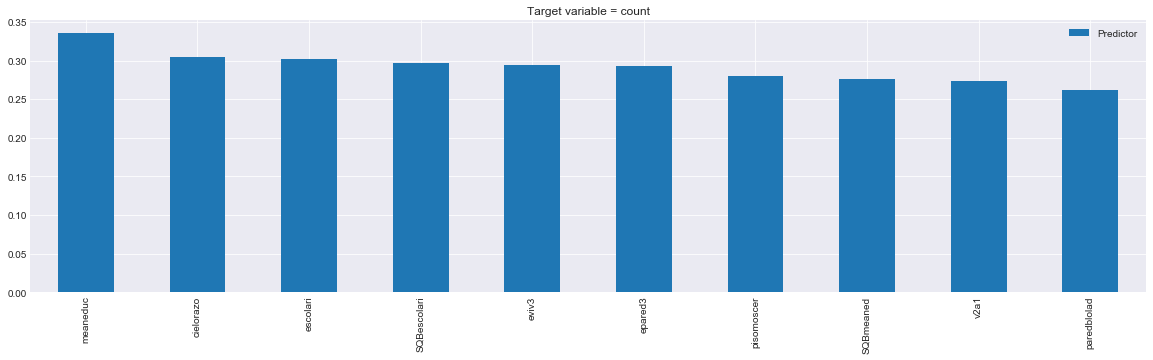

In [11]:
Generals.correlation_plot(Xs, y_pred)

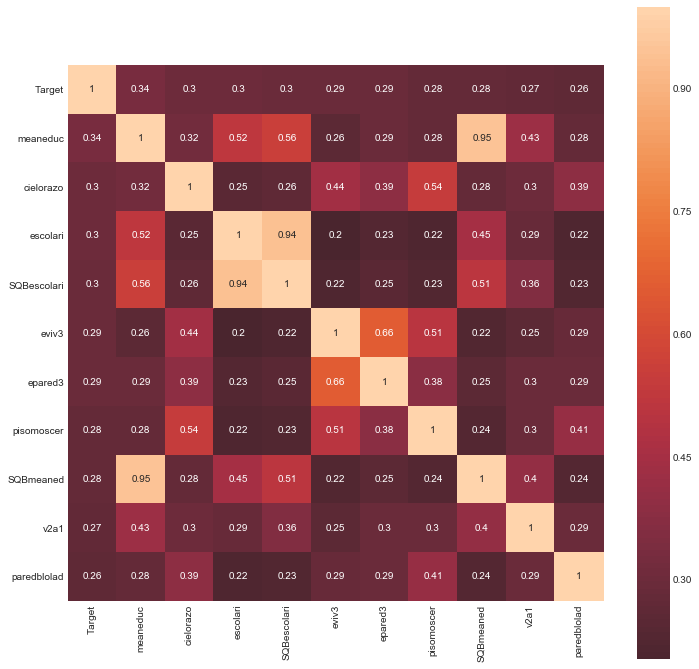

In [12]:
Generals.correlation_matrix(train_set, 'Target', with_annot=True)

In [13]:
class Category:
    def get_graphs():
        graphs = {
            'distplot': Category.dist_plot,
            'bargraph': Category.bar_graph,
            'crosstab': Category.cross_tab
        }
        return graphs

    def get_totalrows(total_labels):
        return int(np.ceil(len(total_labels)/3))

    def get_pos_of_plot(total_rows, i):
        return str(total_rows)+'3'+str(i)
    
    def cross_tab(data, predict, features, more_than_one=False):
        
        return pd.crosstab(predict, features).plot(kind='bar', stacked=True)
        #curr_crosstab.set_xticklabels(target_axis_labels)
        #curr_crosstab.legend(legend)
        
    def dist_plot(data, _, df_feat):
        df_feat.dropna(axis=0, inplace=True)
        return sns.distplot(df_feat)

    def bar_graph(data, _, series_feat):
        return series_feat.value_counts().plot(kind='bar', figsize=(10,3))

    def get_plot(df_data, type_of_graph, predictor, features, category=True, more_than_one=True):
        if more_than_one:
            plt.figure(figsize=(18,8))

            total_rows = Category.get_totalrows(features)
            for i, feat in enumerate(features):
                pos_plt = Category.get_pos_of_plot(total_rows, i)
                plt.subplot(pos_plt)
                if category:
                    Category.get_graphs()[type_of_graph](df_data, predictor, feat)
                else: Category.get_graphs()[type_of_graph](df_data, feat, predictor)
                #ax = plt.gca()
        else:
            Category.get_graphs()[type_of_graph](df_data, predictor, features)
            #plt.show()


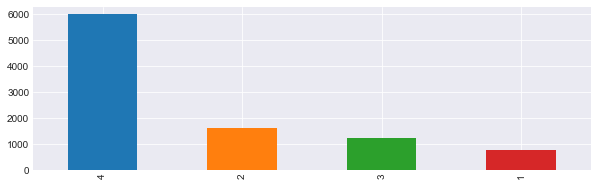

In [14]:
# Doing it manually (no function)
y_pred.value_counts().plot(kind="bar", figsize=(10,3))

In [15]:
# SETTING UP VARIABLES THAT WILL BE USED
TARGET_AXIS_LABELS = ('extreme pov', 'moderate pov', 'vunerable hh', 'non-vunerable hh')

In [16]:
def get_fig_size(features, by_rows=3):
    return np.ceil(len(features)/3)

In [17]:
def cross_tab_1(data, predict, features, legend):
    columns, rows = 3, get_fig_size(features, 3)
    plt.figure(figsize=(15,10))
    
    for i, feat in enumerate(features):
        plt.title("Household item: {0}".format(feat))
        ax = plt.subplot(rows, columns, i+1)
        curr_crosstab = pd.crosstab(predict, train_set[feat]).plot(kind='bar', stacked=True, ax=ax)
        curr_crosstab.set_xticklabels(labels=TARGET_AXIS_LABELS, rotation=40)
        curr_crosstab.legend(legend)


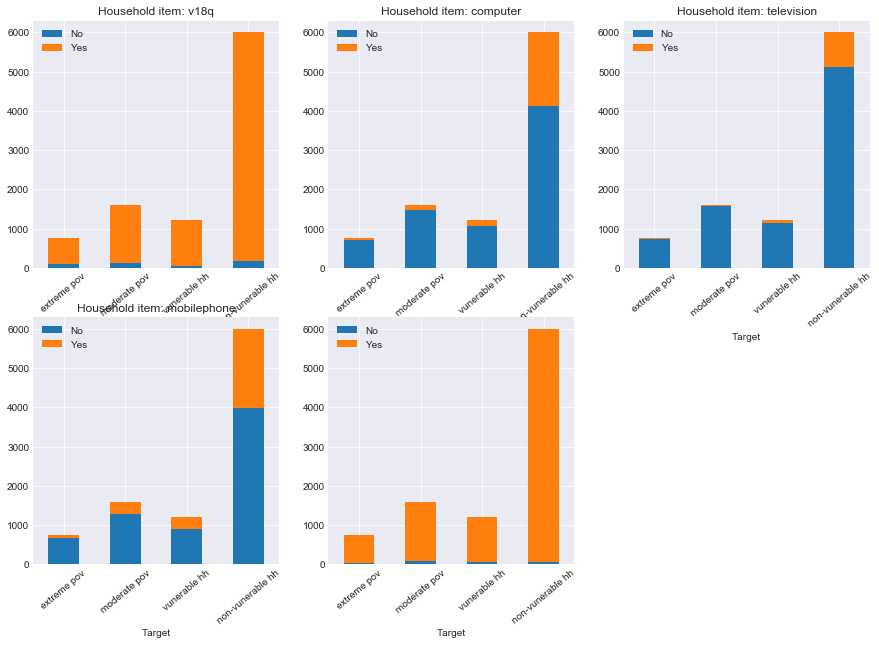

In [19]:
households_items = ('refrig', 'v18q', 'computer', 'television', 'mobilephone')
cross_tab_1(train_set, y_pred, households_items, ["No", "Yes"])

In [34]:
def merge_binary_columns(data, col_list, col_name):
    df = pd.DataFrame(data[col_list].idxmax(axis=1), columns=[col_name])
    df['Target'] = train_set['Target']
    return df

def get_cols_startsith(data, startswith_str):
    return [col for col in data.columns if col.startswith(startswith_str)]


In [35]:
# Pared/Outside columns
list_wall = get_cols_startsith(train_set, 'pared')
df_wall = merge_binary_columns(train_set, list_wall, 'Outside Material')

# Piso/Floor columns
list_floor = get_cols_startsith(train_set, 'piso')
df_floor = merge_binary_columns(train_set, list_floor, 'Floor Material')

# Techo/Roof columns
list_roof = get_cols_startsith(train_set, 'techo')
df_roof = merge_binary_columns(train_set, list_roof, 'Roof Material')

# Sanitario/Sanitary columns
list_sanitary = get_cols_startsith(train_set, 'sanitario')
df_sanitary = merge_binary_columns(train_set, list_sanitary, 'Sanitary Material')

# Energyconcinar/Energy columns
list_energy = get_cols_startsith(train_set, 'energcocinar')
df_energy = merge_binary_columns(train_set, list_energy, 'Energy Material')

# Elimbasu/Disposal columns
list_disposal = get_cols_startsith(train_set, 'elimbasu')
df_disposal = merge_binary_columns(train_set, list_disposal, 'Disposal Material')

In [36]:
# Creating a tuple of all the material
charactertics = (df_wall['Outside Material'], 
                 df_floor['Floor Material'], 
                 df_roof['Roof Material'], 
                 df_sanitary['Sanitary Material'], 
                 df_energy['Energy Material'], 
                 df_disposal['Disposal Material'])

In [37]:
def cross_tab(data, predict, features):
    columns, rows = 3, get_fig_size(features, 3)
    plt.figure(figsize=(15,10))
    
    for i, feat in enumerate(features):
        plt.title("Key Characterstics: {0}".format(feat.name))
        ax = plt.subplot(rows, columns, i+1)
        curr_crosstab = pd.crosstab(feat, predict).plot(kind='bar', stacked=True, ax=ax)
        curr_crosstab.set_xticklabels(labels=feat.unique(), rotation=40)
        curr_crosstab.legend(TARGET_AXIS_LABELS)


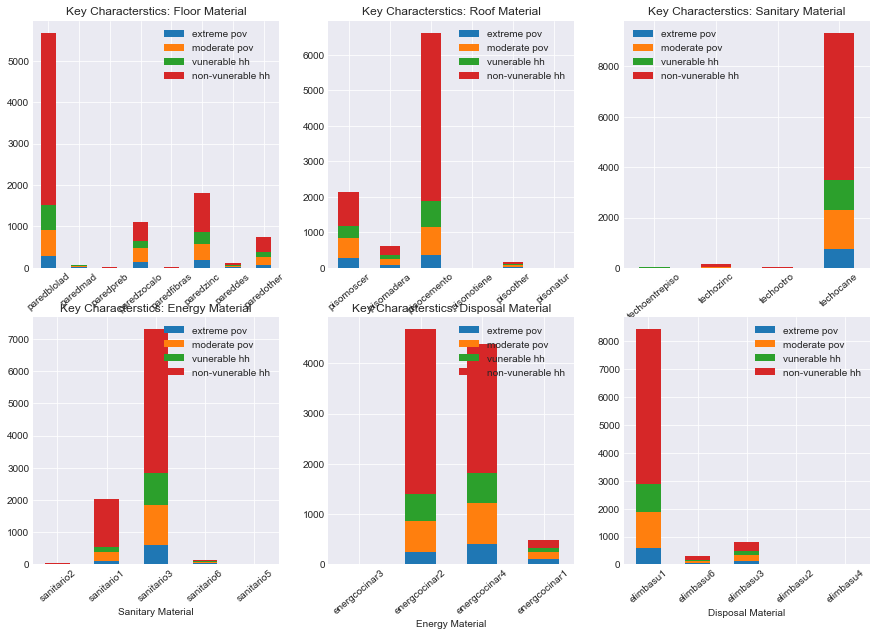

In [38]:
cross_tab(train_set, y_pred, charactertics)

In [45]:
# Diving into the quality of specific house characterstics 

# Pared/Outside columns
list_wall_quality = get_cols_startsith(train_set, 'epared')
df_wall_quality = merge_binary_columns(train_set, list_wall_quality, 'Wall Quality')

# Piso/Floor columns
list_floor_quality = get_cols_startsith(train_set, 'etecho')
df_floor_quality = merge_binary_columns(train_set, list_floor_quality, 'Floor Quality')

# Techo/Roof columns
list_roof_quality = get_cols_startsith(train_set, 'eviv')
df_roof_quality = merge_binary_columns(train_set, list_roof_quality, 'Roof Quality')

# Storing the dataframe in a tuple
qualities = (df_wall_quality['Wall Quality'], 
             df_floor_quality['Floor Quality'], 
             df_roof_quality['Roof Quality'])

In [68]:
def get_values_per_target(data, column_name):
    target_quals = []
    for val in data['Target'].unique():
        df = data[data['Target'] == val][column_name].value_counts()
        df.name = "{0}:{1}".format(df.name, val)
        target_quals.append(df)
    return target_quals

wall_values = get_values_per_target(df_wall_quality, "Wall Quality")
floor_values = get_values_per_target(df_floor_quality, "Floor Quality")
roof_values = get_values_per_target(df_roof_quality, "Roof Quality")

In [69]:
def bar_graph(value_counts):
    columns, rows = 4, get_fig_size(value_counts, 4)
    plt.figure(figsize=(15,10))
    
    for i, each_vc in enumerate(value_counts):
        plt.title("Characterstics: {0}".format(each_vc.name))
        ax = plt.subplot(rows, columns, i+1)
        curr_bargraph = each_vc.plot(kind='bar', ax=ax)
        curr_bargraph.set_xticklabels(labels=each_vc.index, rotation=40)


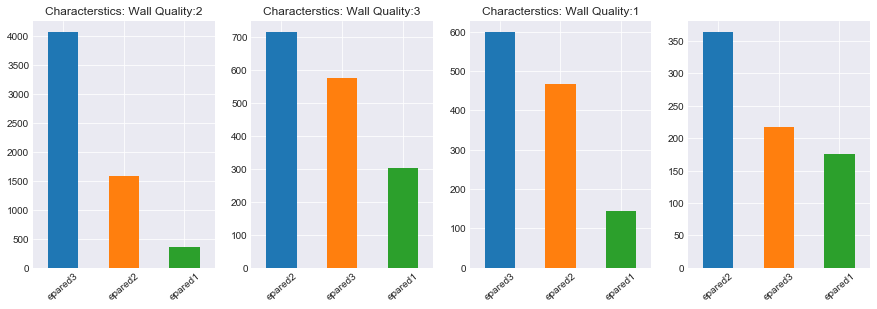

In [70]:
bar_graph(wall_values)

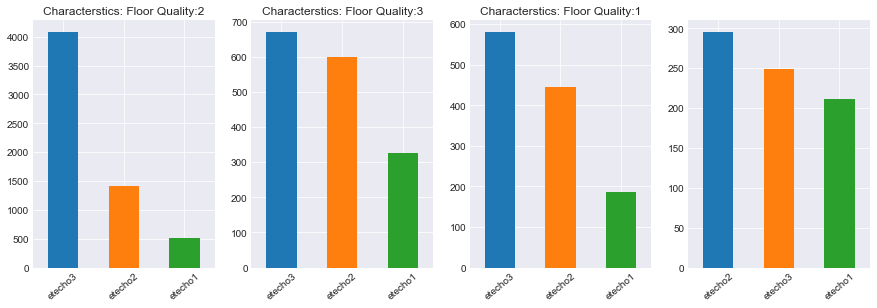

In [71]:
bar_graph(floor_values)

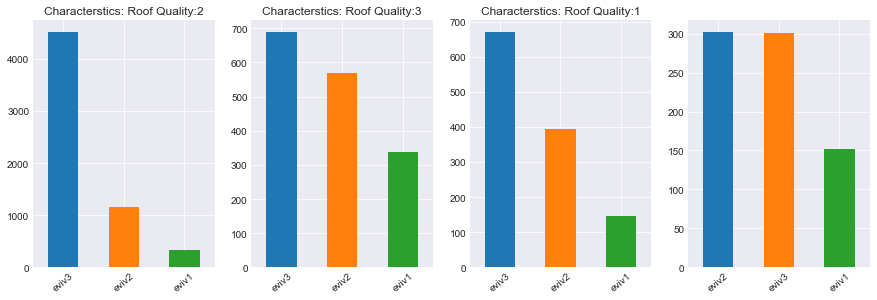

In [72]:
bar_graph(roof_values)

In [51]:
# Diving into the quality of specific house characterstics 

# Education columns
list_education = get_cols_startsith(train_set, 'instlevel')
df_educ_level = merge_binary_columns(train_set, list_education, 'Education Level')

# Status Level columns
list_statuslevel = get_cols_startsith(train_set, 'estadocivil')
df_status_level = merge_binary_columns(train_set, list_statuslevel, 'Status Level')

# Relationships columns
list_relationships = get_cols_startsith(train_set, 'parentesco')
df_relationships = merge_binary_columns(train_set, list_relationships, 'Relationship Level')

# Storing the dataframe in a tuple
family_attributes = (df_educ_level['Education Level'], 
                     df_status_level['Status Level'], 
                     df_relationships['Relationship Level'])

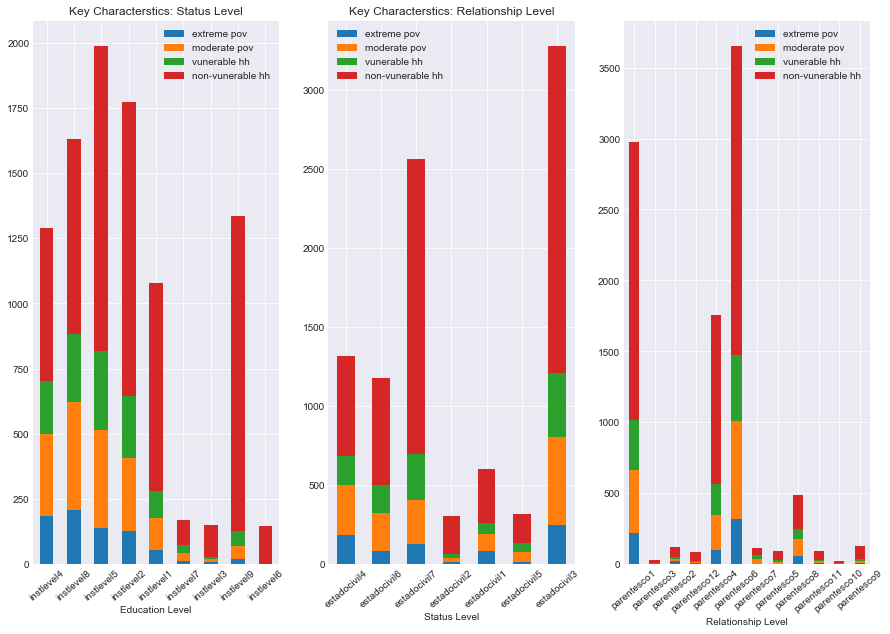

In [52]:
cross_tab(train_set, y_pred, family_attributes)

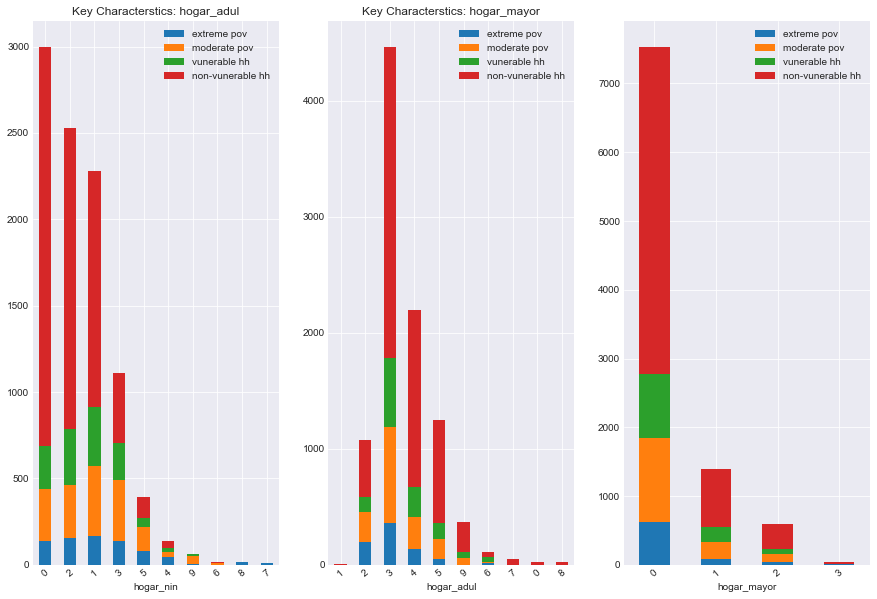

In [53]:
age_groups = (train_set['hogar_nin'], train_set['hogar_adul'], train_set['hogar_mayor'])
cross_tab(train_set, y_pred, age_groups)

/Users/alexguanga/anaconda/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


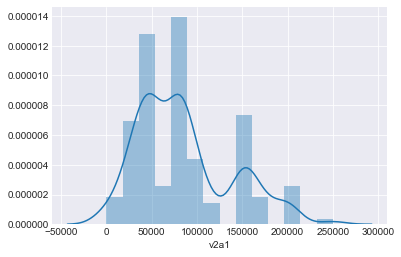

In [296]:
# Displays the dist. of people's income
# As we would expect, there are a lot people earning towards the left with some outliers 
dist_plot(train_set.query('Target == 1')['v2a1'])

/Users/alexguanga/anaconda/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


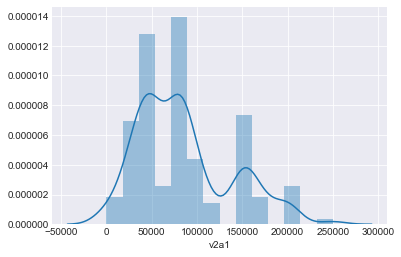

In [298]:
# Displays the dist. of people's income
# As we would expect, there are a lot people earning towards the left with some outliers 
dist_plot(train_set.query('Target == 1')['v2a1'])

/Users/alexguanga/anaconda/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


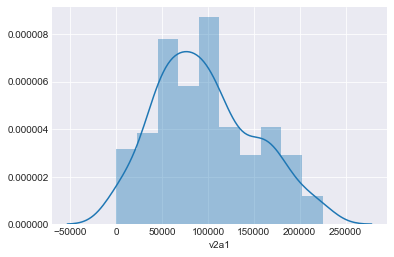

In [299]:
dist_plot(train_set.query('Target == 2')['v2a1'])

/Users/alexguanga/anaconda/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


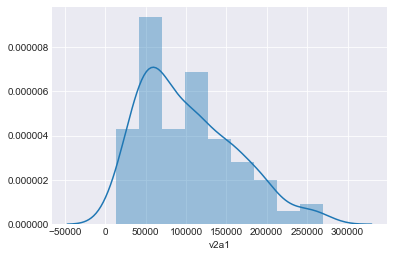

In [300]:
dist_plot(train_set.query('Target == 3')['v2a1'])

/Users/alexguanga/anaconda/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


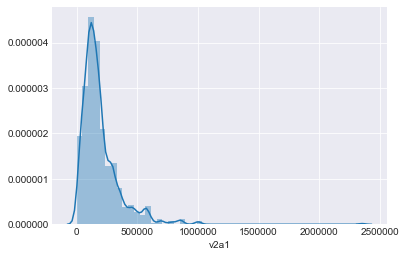

In [301]:
dist_plot(train_set.query('Target == 4')['v2a1'])


/Users/alexguanga/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


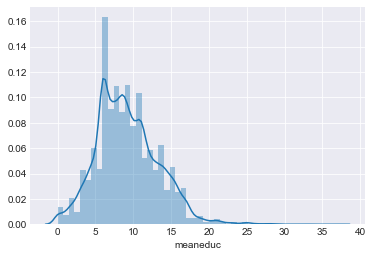

In [15]:
# Displays people's median eduaction (meaneduc)
# People are not recieving much education
Category.get_plot(_, 'distplot', _, all_set['meaneduc'], more_than_one=False)